In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

In [4]:
original_data = pd.read_csv("train.csv")

# Data fields - Info pulled from Kaggle

- id - id of the creature
- bone_length - average length of bone in the creature, normalized between 0 and 1
- rotting_flesh - percentage of rotting flesh in the creature
- hair_length - average hair length, normalized between 0 and 1
- has_soul - percentage of soul in the creature
- color - dominant color of the creature: 'white','black','clear','blue','green','blood'
- type - target variable: 'Ghost', 'Goblin', and 'Ghoul'

Quick overview

In [5]:
original_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [6]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [7]:
original_data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [18]:
original_data['type'].value_counts(), original_data['type'].value_counts()/len(original_data['type'])

(Ghoul     129
 Goblin    125
 Ghost     117
 Name: type, dtype: int64, Ghoul     0.347709
 Goblin    0.336927
 Ghost     0.315364
 Name: type, dtype: float64)

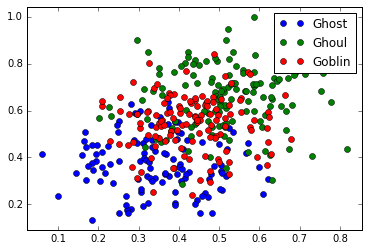

In [31]:
type_group = original_data.groupby('type')
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in type_group:
    ax.plot(group.bone_length, group.hair_length, marker = 'o', linestyle='', ms=6, label = name)
ax.legend()

There doesnt seem to be a clear divide amongst the three. Although Ghost and Ghoul have clear seperations, Goblin seems to blend into both

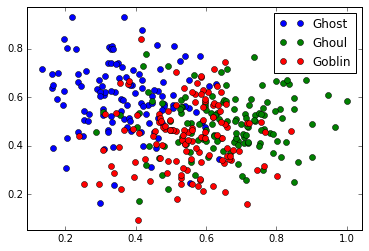

In [35]:
fig, ax2 = plt.subplots()
ax2.margins(0.05)
for name, group in type_group:
    ax2.plot(group.hair_length, group.rotting_flesh, marker = 'o', linestyle='', ms=6, label = name)
ax2.legend()

In [39]:
data = original_data.copy()

In [40]:
rotting_flesh_max = data['rotting_flesh'].max()
rotting_flesh_min = data['rotting_flesh'].min()
rotting_flesh_difference = rotting_flesh_max - rotting_flesh_min
data['rotting_flesh_norm'] = data['rotting_flesh'].apply(lambda x: (x - rotting_flesh_min)/(rotting_flesh_difference))

In [ ]:
data_group = data.groupby('type')

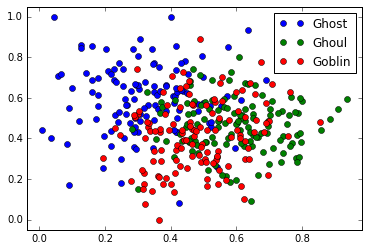

In [45]:
fig, ax3 = plt.subplots()
ax3.margins(0.05)
for name, group in data_group:
    ax3.plot(group.has_soul, group.rotting_flesh_norm, marker = 'o', linestyle='', ms=6, label = name)
ax3.legend()